In [2]:
"""
This cell does the initial project setup.
If you start a new script or notebook, make sure to copy & paste this part.

A script with this code uses the location of the `.env` file as the anchor for
the whole project (= PROJECT_ROOT). Afterwards, code inside the `src` directory
are available for import.
"""
from pathlib import Path
import sys
from dotenv import load_dotenv, find_dotenv
load_dotenv()
PROJECT_ROOT = Path(find_dotenv()).parent
sys.path.append(str(PROJECT_ROOT.joinpath("src")))
print(f"Project root directory: {PROJECT_ROOT}")

Project root directory: /Users/hamida/Documents/GitHub/male-drosophila-visual-system-connectome-code


In [3]:
from neuprint import NeuronCriteria as NC

import navis
import navis.interfaces.neuprint as neu

from utils import olc_client

c = olc_client.connect(verbose=True)

Connected to https://neuprint-cns.janelia.org[cns].
Client: neuprint-python v0.1.0
User: aishahamid201@gmail.com [readwrite]



In [4]:
import matplotlib.pyplot as plt

In [5]:
from neuprint import fetch_neurons, fetch_synapses, SynapseCriteria as SC, fetch_adjacencies, merge_neuron_properties, NeuronCriteria as NC

In [6]:
neuron_df, roi_df = fetch_neurons(NC(type='AOTU001'))
neuron_df, roi_counts_df = fetch_neurons(NC(type='AOTU001'))

/Users/hamida/Documents/GitHub/male-drosophila-visual-system-connectome-code/.pixi/envs/default/lib/python3.12/site-packages/neuprint/client.py:609: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neuron_props_val = df_results.iloc[0][0]
/Users/hamida/Documents/GitHub/male-drosophila-visual-system-connectome-code/.pixi/envs/default/lib/python3.12/site-packages/neuprint/client.py:619: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neuron_props_val = df_results.iloc[0][0]


In [8]:
neuron_df

,bodyId,instance,type,pre,post,downstream,upstream,size,status,statusLabel,...,predictedNt,assignedOlHex1,predictedNtConfidence,rootSide,celltypePredictedNtConfidence,celltypeTotalNtPredictions,mancGroup,mancBodyid,inputRois,outputRois
0,32894,AOTU001_L,AOTU001,333,1748,2598,1748,603705066,Traced,Roughly traced,...,acetylcholine,None,0.511545,None,0.550246,2323,None,None,"[AOTU(L), CRE(R), CentralBrain, CentralBrain-u...","[AOTU(L), CRE(R), CentralBrain, CentralBrain-u..."
1,35228,AOTU001_R,AOTU001,374,2375,2733,2375,555883565,Traced,Roughly traced,...,acetylcholine,None,0.617607,None,0.550246,2323,None,None,"[AOTU(R), CentralBrain, CentralBrain-unspecifi...","[AOTU(R), CentralBrain, CentralBrain-unspecifi..."
2,36409,AOTU001_R,AOTU001,328,1825,2628,1825,518376115,Traced,Roughly traced,...,acetylcholine,None,0.593110,None,0.550246,2323,None,None,"[AOTU(R), CentralBrain, CentralBrain-unspecifi...","[CentralBrain, CentralBrain-unspecified, EPA(L..."
3,71967,AOTU001_R,AOTU001,315,1799,2243,1799,443230651,Traced,Roughly traced,...,acetylcholine,None,0.602459,None,0.550246,2323,None,None,"[AOTU(R), CentralBrain, CentralBrain-unspecifi...","[AOTU(R), CentralBrain, CentralBrain-unspecifi..."
4,103686,AOTU001_L,AOTU001,375,1999,2693,1999,570039889,Traced,Roughly traced,...,unclear,None,0.486116,None,0.550246,2323,None,None,"[AOTU(L), CentralBrain, CentralBrain-unspecifi...","[AOTU(L), CentralBrain, CentralBrain-unspecifi..."
5,141703,AOTU001_R,AOTU001,277,1518,2010,1518,348373805,Traced,Roughly traced,...,acetylcholine,None,0.530895,None,0.550246,2323,None,None,"[AOTU(R), CentralBrain, CentralBrain-unspecifi...","[AOTU(R), CentralBrain, CentralBrain-unspecifi..."
6,382559434,AOTU001_L,AOTU001,321,1797,2169,1797,474495122,Traced,Roughly traced,...,acetylcholine,None,0.508492,None,0.550246,2323,None,None,"[AOTU(L), CentralBrain, CentralBrain-unspecifi...","[AOTU(L), CentralBrain, CentralBrain-unspecifi..."


In [9]:
roi_counts_df

,bodyId,roi,pre,post,downstream,upstream
0,32894,AOTU(L),6,1537,16,1537
1,32894,CRE(R),12,8,100,8
2,32894,CentralBrain,333,1748,2598,1748
3,32894,CentralBrain-unspecified,1,17,2,17
4,32894,EPA(R),29,12,226,12
...,...,...,...,...,...,...
60,382559434,LAL(R),290,192,1974,192
61,382559434,NotPrimary,0,0,0,0
62,382559434,SIP(L),4,70,18,70
63,382559434,VES(R),9,4,68,4


In [10]:
from neuprint import fetch_adjacencies, NeuronCriteria as NC

# Example: Fetch all downstream connections FROM a set of neurons
# neuron_df, conn_df = fetch_adjacencies([387023620, 387364605, 416642425], None)

# Example: Fetch all upstream connections TO a set of neurons
# neuron_df, conn_df = fetch_adjacencies(None, [387023620, 387364605, 416642425])

# Example: Fetch all direct connections between a set of upstream neurons and downstream neurons
neuron_df, conn_df = fetch_adjacencies(NC(type='AOTU.*'))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [11]:
#syn_df = fetch_synapses()
conn_df.sort_values('weight', ascending=False)

,bodyId_pre,bodyId_post,roi,weight
9236,10526,11943,AOTU(L),471
7400,10410,11943,AOTU(L),460
16818,11764,523317,SIP(R),418
9252,10526,13830,AOTU(R),411
7464,10410,18020,AOTU(L),406
...,...,...,...,...
30332,17953,523317,AOTU(R),1
30331,17953,522966,VES(L),1
61901,82711,512460,CRE(R),1
61902,82711,514036,CRE(R),1


In [12]:
from neuprint import merge_neuron_properties

conn_df = merge_neuron_properties(neuron_df, conn_df, ['type', 'instance'])
conn_df

,bodyId_pre,bodyId_post,roi,weight,type_pre,instance_pre,type_post,instance_post
0,10005,10030,EPA(L),9,AOTU019,AOTU019_R,pIP1,(pIP1)_L
1,10005,10030,SPS(L),4,AOTU019,AOTU019_R,pIP1,(pIP1)_L
2,10005,10030,LAL(L),1,AOTU019,AOTU019_R,pIP1,(pIP1)_L
3,10005,10030,VES(L),1,AOTU019,AOTU019_R,pIP1,(pIP1)_L
4,10005,10031,AOTU(R),1,AOTU019,AOTU019_R,AOTU041,AOTU041_R
...,...,...,...,...,...,...,...,...
90582,382559434,532909,LAL(R),5,AOTU001,AOTU001_L,LAL123,LAL123_L
90583,382559434,533667,LAL(R),1,AOTU001,AOTU001_L,LAL127,LAL127_R
90584,382559434,534301,LAL(R),1,AOTU001,AOTU001_L,CRE041,CRE041_R
90585,382559434,536054,SIP(L),1,AOTU001,AOTU001_L,SMP155,SMP155_R


In [13]:
from neuprint.utils import connection_table_to_matrix

In [14]:
matrix = connection_table_to_matrix(conn_df, 'bodyId', sort_by='type')
matrix.iloc[:10, :10] 

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [17]:
Neuron_criteria_pre = NC(rois=['LA(R)','ME(R)','AME(R)','LO(R)','LOP(R)'], roi_req='any')
Neuron_criteria_post  = NC(type='AOTU001')

neurons_OL_df,connections_OL_df = fetch_adjacencies(Neuron_criteria_pre,Neuron_criteria_post, min_roi_weight=3)
conn_OL_df = merge_neuron_properties(neurons_OL_df, connections_OL_df, 'type')

In [18]:
conn_OL_df

,bodyId_pre,bodyId_post,roi,weight,type_pre,type_post
0,11214,71967,AOTU(R),4,LoVC22,AOTU001
1,13830,141703,AOTU(R),3,LT52,AOTU001
2,14002,103686,LAL(R),4,LC33,AOTU001
3,14459,71967,AOTU(R),3,LT52,AOTU001
4,14671,35228,AOTU(R),5,LT43,AOTU001
...,...,...,...,...,...,...
669,511797,71967,EPA(L),3,LoVC11,AOTU001
670,511797,141703,LAL(L),19,LoVC11,AOTU001
671,526785,35228,AOTU(R),8,LC10d,AOTU001
672,526785,71967,AOTU(R),22,LC10d,AOTU001


(array([666.,   0.,   2.,   0.,   0.,   1.,   0.,   4.,   0.,   1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

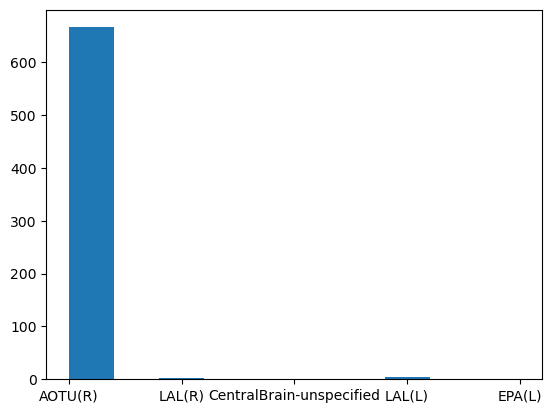

In [19]:
plt.hist(conn_OL_df['roi'])

In [20]:
conn_OL_df['roi'].unique()

array(['AOTU(R)', 'LAL(R)', 'CentralBrain-unspecified', 'LAL(L)',
       'EPA(L)'], dtype=object)